# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#importing all the require libraries 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
#importing the dataset

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(614, 13)

We have 614 rows and 13 columns 

In [7]:
df.drop(['Loan_ID'],axis=1,inplace=True)

We are dropping the "Loan_ID" column since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 40.8+ KB


In [9]:
df.shape

(614, 12)

In [10]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now, lets replace null values with mean and mode values

In [11]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode())

In [12]:
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(value=df['Credit_History'].mode()[0],inplace=True)

In [14]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 40.8+ KB


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

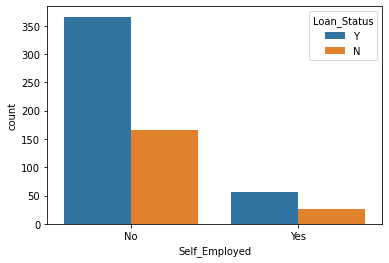

In [17]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

most of the data we have from not employed person Here we see if the person is not self employed there is high chances of approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

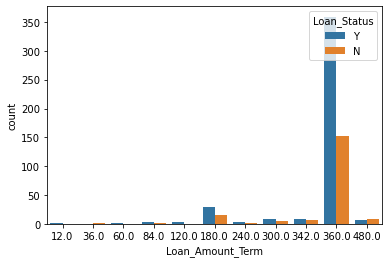

In [18]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved People those are taking loan for 480 months, most of them are getting approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

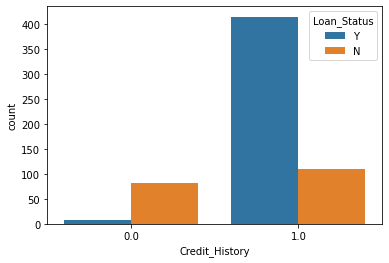

In [19]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

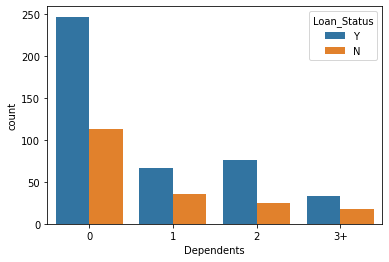

In [20]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

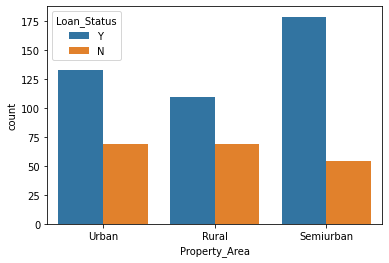

In [21]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

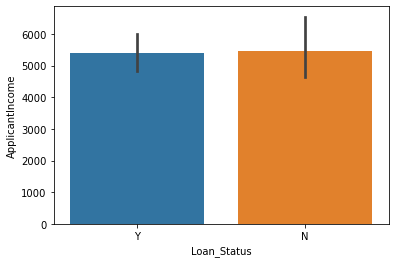

In [22]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

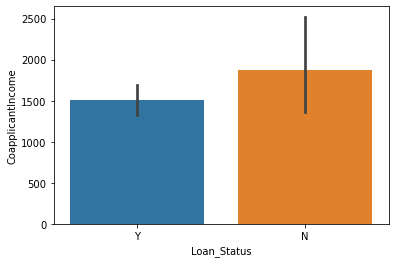

In [23]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:>

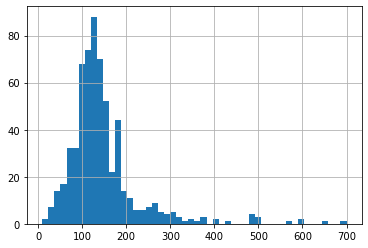

In [24]:
df['LoanAmount'].hist(bins=50)

In [25]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,0.009170,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,-0.010938,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.040160,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.073658,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,0.001550,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.031103,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,-0.029919,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.032487,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.081384,-0.066941,0.085191
Credit_History,0.009170,-0.010938,0.040160,0.073658,0.001550,0.031103,-0.029919,0.032487,0.081384,1.000000,-0.030248,0.540556


<AxesSubplot:>

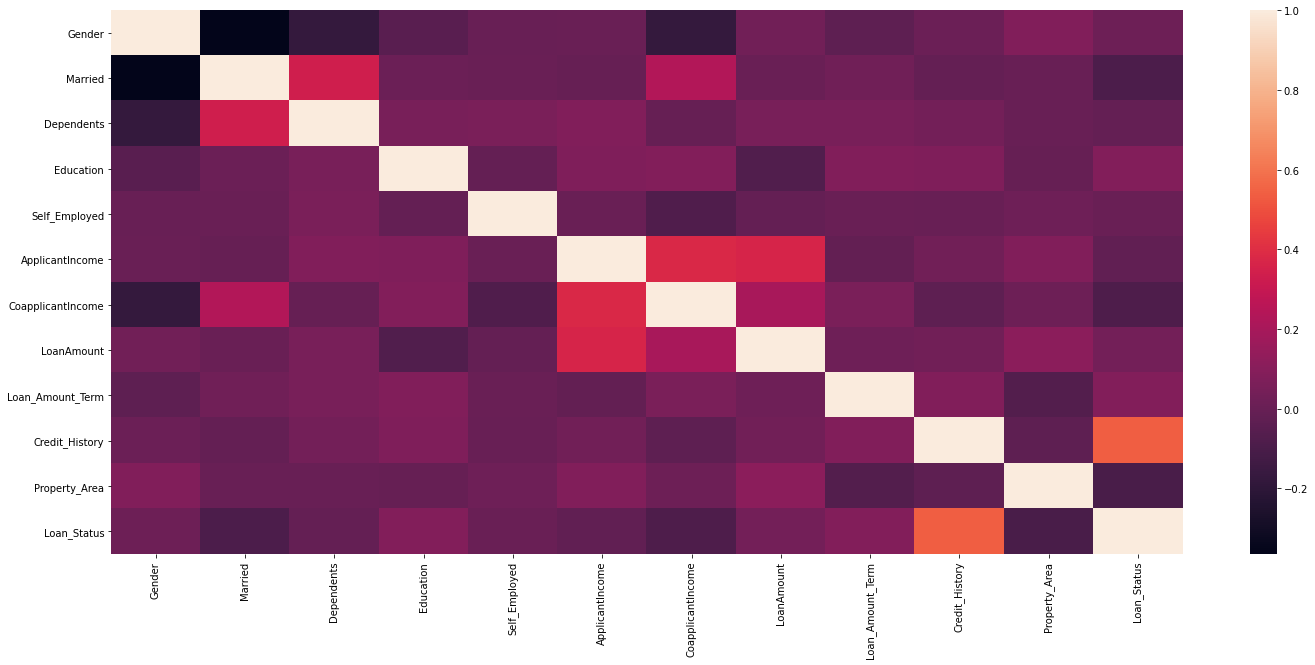

In [26]:
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

# Data pre-processing

In [27]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

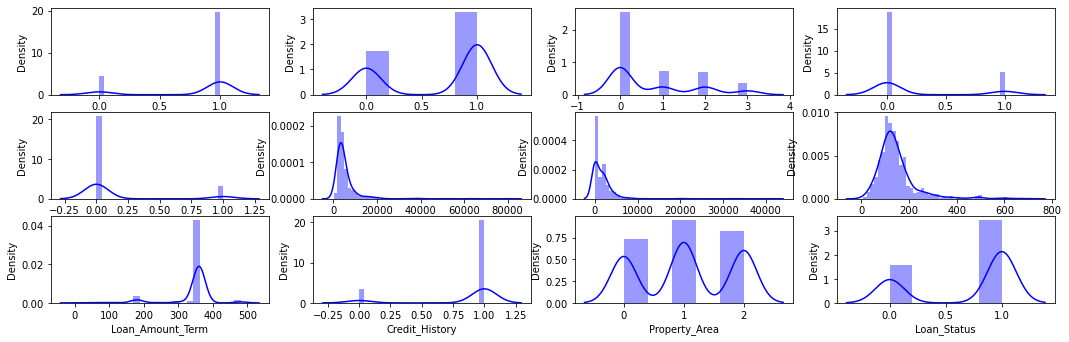

In [29]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

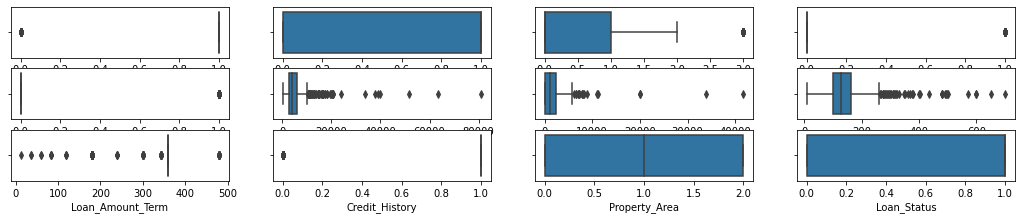

In [30]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# skewness and outlier removal

In [31]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [32]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (614, 12)
[[0.47234264 1.37208932 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.41173269 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.42876026 0.04760721 1.48253724]]


In [33]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int32), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int32))


In [34]:
after_zscore = df[(z < 3).all(axis=1)]

In [35]:
after_zscore.shape

(577, 12)

In [36]:
df.shape

(614, 12)

In [37]:
df=after_zscore

In [38]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [39]:
df1 = np.sqrt(df)

df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,76.478755,0.000000,12.100089,18.973666,1.0,1.414214,1.0
1,1.0,1.0,1.0,0.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,0.000000,0.0
2,1.0,1.0,0.0,0.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,1.414214,1.0
3,1.0,1.0,0.0,1.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,1.414214,1.0
4,1.0,0.0,0.0,0.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,1.414214,1.0


In [40]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.456414
Credit_History      -1.976043
Property_Area       -0.598165
Loan_Status         -0.822635
dtype: float64

In [41]:
df=df1

# Feature Engineering

In [42]:
y = df['Loan_Status']
x = df.drop('Loan_Status', axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

# Treating data imbalance

In [45]:
print(df['Loan_Status'].value_counts())

1.0    398
0.0    179
Name: Loan_Status, dtype: int64


In [46]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Loan_Status==0]
label1=X[X.Loan_Status==1]
label_unsampled=resample(label0,replace=True,n_samples=len(label1),random_state=27)
unsampled=pd.concat([label1,label_unsampled])
unsampled.Loan_Status.value_counts()

0.0    325
1.0    325
Name: Loan_Status, dtype: int64

In [47]:
x_train= unsampled.drop(columns='Loan_Status')
y_train= unsampled['Loan_Status']

# scaling

In [48]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [49]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [50]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.823077,0.667692,0.302322,0.243077,0.156923,0.435810,0.299996,0.520306,0.586315,0.744615,0.574900
std,0.381897,0.471403,0.377713,0.429272,0.364008,0.153077,0.281188,0.144931,0.208417,0.436413,0.416658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.330779,0.000000,0.439380,0.654373,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.399818,0.388146,0.513371,0.654373,1.000000,0.707107
75%,1.000000,1.000000,0.577350,0.000000,0.000000,0.516261,0.518397,0.595135,0.654373,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model construction 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7758620689655172
[[20 23]
 [ 3 70]]
              precision    recall  f1-score   support

         0.0       0.87      0.47      0.61        43
         1.0       0.75      0.96      0.84        73

    accuracy                           0.78       116
   macro avg       0.81      0.71      0.72       116
weighted avg       0.80      0.78      0.76       116



In [53]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.6897761645493043

# RandomForestClassifier

In [54]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

         0.0       0.82      0.53      0.65        43
         1.0       0.77      0.93      0.84        73

    accuracy                           0.78       116
   macro avg       0.80      0.73      0.75       116
weighted avg       0.79      0.78      0.77       116



In [55]:
randomforest_accu

0.7844827586206896

In [56]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv = 5).mean()
randomforest_cv

0.9107692307692309

# GaussianNB

In [57]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7931034482758621


,precision,recall,f1-score,support
0.0,0.913043,0.488372,0.636364,43.000000
1.0,0.763441,0.972603,0.855422,73.000000
accuracy,0.793103,0.793103,0.793103,0.793103
macro avg,0.838242,0.730487,0.745893,116.000000
weighted avg,0.818897,0.793103,0.774219,116.000000


In [58]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.814670296430732

# KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7327586206896551


,precision,recall,f1-score,support
0.0,0.642857,0.627907,0.635294,43.000000
1.0,0.783784,0.794521,0.789116,73.000000
accuracy,0.732759,0.732759,0.732759,0.732759
macro avg,0.713320,0.711214,0.712205,116.000000
weighted avg,0.731544,0.732759,0.732096,116.000000


In [60]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.6516938898971567

# DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.7327586206896551


,precision,recall,f1-score,support
0.0,0.650000,0.604651,0.626506,43.000000
1.0,0.776316,0.808219,0.791946,73.000000
accuracy,0.732759,0.732759,0.732759,0.732759
macro avg,0.713158,0.706435,0.709226,116.000000
weighted avg,0.729492,0.732759,0.730619,116.000000


In [62]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv =13).mean()
dtc_cv

0.7332556332556331

# LogisticRegression

In [63]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression(solver='lbfgs', max_iter=400,random_state=42)

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.7844827586206896
[[22 21]
 [ 4 69]]


,precision,recall,f1-score,support
0.0,0.846154,0.511628,0.637681,43.000000
1.0,0.766667,0.945205,0.846626,73.000000
accuracy,0.784483,0.784483,0.784483,0.784483
macro avg,0.806410,0.728417,0.742153,116.000000
weighted avg,0.796132,0.784483,0.769172,116.000000


In [65]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 3).mean()
logisticregression_cv

0.8145689407023604

In [66]:
print("model                    ","accuracy           ","cv          ","difference")
print("-------------------------------------------------------------------------------------")
print("random forest            ", round(randomforest_accu,2),"            ",round(randomforest_cv,2 ),"               ",round(randomforest_accu-randomforest_cv,2 ))
print("logisticregression       ",round(logisticregression_acc,2),"            ",round(logisticregression_cv,2),"               ",round(logisticregression_acc-logisticregression_cv,2 ))
print("SVC                      ",round(svc_acc,2),"            ",round(svc_cv,2),"               ",round(svc_acc-svc_cv,2 ))
print("gaussian naive bayes     ",round(gnb_acc,2),"           ",round(gnb_cv,2),"               ",round(gnb_acc-gnb_cv,2 ))
print("decission tree classifier",round(dtc_acc,2),"            ",round(dtc_cv,2),"               ",round(dtc_acc-dtc_cv,2 ))
print("KNN                      ",round(knn_acc,2),"            ",round(knn_cv,2),"               ",round(knn_acc-knn_cv,2 ))

model                     accuracy            cv           difference
-------------------------------------------------------------------------------------
random forest             0.78              0.91                 -0.13
logisticregression        0.78              0.81                 -0.03
SVC                       0.78              0.69                 0.09
gaussian naive bayes      0.79             0.81                 -0.02
decission tree classifier 0.73              0.73                 -0.0
KNN                       0.73              0.65                 0.08


The best model for this problem is gaussian naive bayes which gives least diff btween accuracy score and cv score.

# Hyper parameter Tuning

In [67]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.2747252747252746
least value 0 1.2747252747252746
1 1.397590361445783
2 1.8315789473684212
3 1.4499999999999993
4 1.2689832689832687
least value 4 1.2689832689832687
5 1.2523616734143053
least value 5 1.2523616734143053
6 1.1102788181439864
least value 6 1.1102788181439864
7 1.045045045045045
least value 7 1.045045045045045
8 1.056260162601626
9 1.7474892395982786
10 1.3647058823529408
11 1.2083333333333333
12 1.3033707865168536
13 1.6513888888888884
14 1.5281862745098043
15 1.2946428571428574
16 1.4412233195285122
17 1.4967741935483867
18 1.1570141570141568
19 1.3906093906093906
20 1.3694444444444438
21 1.3911816578483243
22 1.3502645502645498
23 1.358048780487805
24 1.539454806312769
25 1.576086956521739
26 1.3133533133533133
27 1.4480431848852904
28 1.1865961199294528
29 1.1446191797718164
30 1.2888888888888885
31 1.3133533133533133
32 1.252361673414305
33 1.6091954022988506
34 1.3860294117647063
35 1.4499999999999993
36 1.409722222222222
37 1.545121545121545
38 1.39759036144578

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=39)

In [69]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [70]:
gs_NB.best_params_

{'var_smoothing': 1e-05}

In [71]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing = 1e-05)

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.8879310344827587


,precision,recall,f1-score,support
0.0,1.000000,0.628571,0.771930,35.000000
1.0,0.861702,1.000000,0.925714,81.000000
accuracy,0.887931,0.887931,0.887931,0.887931
macro avg,0.930851,0.814286,0.848822,116.000000
weighted avg,0.903430,0.887931,0.879314,116.000000


In [72]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 5).mean()
gnb_cv

0.8146026986506746

The best model is Gaussian NB with 88% accuracy

# Evaluation metric

In [74]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [76]:
print("------------------------------------------")
print("GaussianNB")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_gnb = gnb_acc
print('Accuracy: %f' % accuracy_gnb)
# precision tp / (tp + fp)
precision_gnb = precision_score(y_test, predGNB)
print('Precision: %f' % precision_gnb)
# recall: tp / (tp + fn)
recall_gnb = recall_score(y_test, predGNB)
print('Recall: %f' % recall_gnb)
# f1: 2 tp / (2 tp + fp + fn)
f1_gnb = f1_score(y_test, predGNB)
print('F1 score: %f' % f1_gnb)

------------------------------------------
GaussianNB
-----------------------------------------
Accuracy: 0.887931
Precision: 0.861702
Recall: 1.000000
F1 score: 0.925714


# roc_auc_score

In [77]:
# train models
model1 = GaussianNB()

# fit model
model1.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

In [79]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [80]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.835626102292769


# Model saving

In [81]:
import joblib
joblib.dump(GNB,"final model.pkl")

['final model.pkl']